In [48]:
#necessary imports
import pandas as pd
import geopandas as gpd
import numpy as np
from pyproj import Proj, transform
import rasterio
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import random
from deepforest import main
from deepforest import get_data

In [49]:
#load final dataset 
df = pd.read_csv('final_dataset_filtered.csv') 

## Using Basic DeepForest Model

In [50]:
model = main.deepforest()
model.use_release()

Reading config file: /opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [51]:
sample_image_path = "data/tiles/processed/Nestor Macias RGB_9_7600_3800_11600_7800.png"

In [52]:
boxes = model.predict_image(path=sample_image_path, return_plot = True, color=(0, 0, 255), thickness=10)

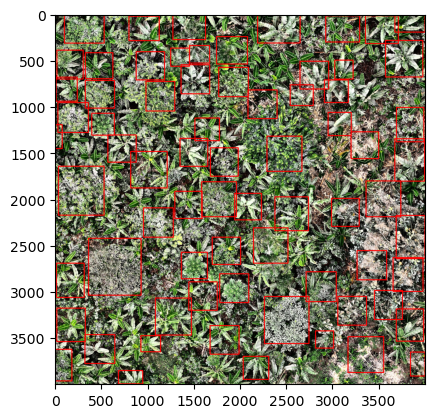

In [53]:
import matplotlib.pyplot as plt
plt.imshow(boxes[:,:,::-1])

In [54]:
df

,img_path,xmin,ymin,xmax,ymax,score,img_name,tile_index,tile_xmin,tile_ymin,...,is_musacea_g,site,X_g,Y_g,updated diameter,group,updated height,AGB,carbon,id
0,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,3332.557861,19.092411,3661.390137,364.616425,0.531211,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,5298.555843,7709.844671,10.281385,banana,0.0,4.293300,1.674387,30
1,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,3162.579834,2148.233398,3431.632324,2379.467041,0.511510,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,5315.345160,8606.745732,13.528139,banana,0.0,7.702971,3.004159,112
2,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,2893.605713,244.011108,3095.620605,451.257812,0.251310,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,5228.142461,7935.770200,12.732366,banana,0.0,6.769828,2.640233,179
3,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,2595.111084,1703.712402,2765.227295,1865.253418,0.217742,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,4434.058601,8354.081799,9.867583,banana,0.0,3.933601,1.534104,93
4,Carlos Vera Guevara RGB_10_7600_7600_11600_116...,249.691879,123.626862,439.557648,302.768402,0.282849,Carlos Vera Guevara RGB,10,7600,7600,...,1.0,Carlos Vera Guevara RGB,8257.952942,7554.538338,17.825312,banana,0.0,13.862143,5.406236,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,Nestor Macias RGB_3_0_9024_4000_13024.png,2664.345215,232.421860,2992.793945,577.599243,0.401987,Nestor Macias RGB,3,0,9024,...,0.0,Nestor Macias RGB,5083.016310,8395.427219,8.404929,other,0.0,16.643291,6.490884,167
2598,Nestor Macias RGB_3_0_9024_4000_13024.png,3003.697266,15.084885,3288.265381,276.357574,0.356021,Nestor Macias RGB,3,0,9024,...,0.0,Nestor Macias RGB,5232.131207,8130.712274,8.785332,fruit,0.0,24.072524,9.388284,108
2599,Nestor Macias RGB_3_0_9024_4000_13024.png,2624.353027,7.873686,2908.305420,132.604980,0.240188,Nestor Macias RGB,3,0,9024,...,0.0,Nestor Macias RGB,5162.918189,8152.987700,8.359419,cacao,2.2,8.090504,3.155296,162
2600,Nestor Macias RGB_10_7600_7600_11600_11600.png,1168.633789,1419.221558,1340.020508,1599.804932,0.455914,Nestor Macias RGB,10,7600,7600,...,0.0,Nestor Macias RGB,9463.438380,8020.578424,5.220658,cacao,1.5,3.185392,1.242303,500


### Making my dataset in the format deepforest expects

In [55]:
deepforest_data = df[['img_path', 'xmin', 'ymin', 'xmax', 'ymax']]
deepforest_data['label'] = 'Tree'

/var/folders/ym/hz9zm7z56_z32pf0g7q1mxdw0000gp/T/ipykernel_94367/3833116394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deepforest_data['label'] = 'Tree'


In [56]:
#rename img_path to image_path
deepforest_data = deepforest_data.rename(columns={'img_path': 'image_path'})

In [57]:
deepforest_data

,image_path,xmin,ymin,xmax,ymax,label
0,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,3332.557861,19.092411,3661.390137,364.616425,Tree
1,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,3162.579834,2148.233398,3431.632324,2379.467041,Tree
2,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,2893.605713,244.011108,3095.620605,451.257812,Tree
3,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,2595.111084,1703.712402,2765.227295,1865.253418,Tree
4,Carlos Vera Guevara RGB_10_7600_7600_11600_116...,249.691879,123.626862,439.557648,302.768402,Tree
...,...,...,...,...,...,...
2597,Nestor Macias RGB_3_0_9024_4000_13024.png,2664.345215,232.421860,2992.793945,577.599243,Tree
2598,Nestor Macias RGB_3_0_9024_4000_13024.png,3003.697266,15.084885,3288.265381,276.357574,Tree
2599,Nestor Macias RGB_3_0_9024_4000_13024.png,2624.353027,7.873686,2908.305420,132.604980,Tree
2600,Nestor Macias RGB_10_7600_7600_11600_11600.png,1168.633789,1419.221558,1340.020508,1599.804932,Tree


In [58]:
#splitting into training and test sets 
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(deepforest_data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [59]:
train_data.to_csv('data/deepforest_train_dataset.csv', index=False)
val_data.to_csv('data/deepforest_val_dataset.csv', index=False)
test_data.to_csv('data/deepforest_test_dataset.csv', index=False)

In [61]:
m = main.deepforest()
m.config['gpus'] = '-1' #move to GPU and use all the GPU resources
m.config["train"]["csv_file"] = 'data/deepforest_train_dataset.csv'
m.config["train"]["root_dir"] = 'data/tiles/processed'
m.config["score_thresh"] = 0.4
m.config["train"]['epochs'] = 10
m.config["validation"]["csv_file"] = 'data/deepforest_val_dataset.csv'
m.config["validation"]["root_dir"] = 'data/tiles/processed'
#create a pytorch lighting trainer used to training
m.create_trainer()
#load the lastest release model
m.use_release()

Reading config file: /opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [62]:
import time
start_time = time.time()
m.trainer.fit(m)
print(f"--- Training on GPU: {(time.time() - start_time):.2f} seconds ---")

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

  | Name       | Type                  | Params | Mode 
-------------------------------------------------------------
0 | model      | RetinaNet             | 32.1 M | train
1 | iou_metric | IntersectionOverUnion | 0      | train
2 | mAP_metric | MeanAveragePrecision  | 0      | train
-------------------------------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.1 M    Total params
128.592   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/albumentations/core/composition.py:144: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()
/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
python(67765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/evaluate.py:193: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat(results)
/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
python(67997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch 0:   0%|          | 0/92 [00:00<?, ?it/s] 

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 0: 100%|██████████| 92/92 [02:23<00:00,  0.64it/s, v_num=14]

python(70964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 1:   0%|          | 0/92 [00:00<?, ?it/s, v_num=14]         

python(76004) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 1: 100%|██████████| 92/92 [02:16<00:00,  0.67it/s, v_num=14]

python(78690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 2:   0%|          | 0/92 [00:00<?, ?it/s, v_num=14]         

python(83656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 2: 100%|██████████| 92/92 [02:35<00:00,  0.59it/s, v_num=14]

python(86718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 3:   0%|          | 0/92 [00:00<?, ?it/s, v_num=14]         

python(93217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 3: 100%|██████████| 92/92 [02:34<00:00,  0.59it/s, v_num=14]

python(96409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 4:   0%|          | 0/92 [00:00<?, ?it/s, v_num=14]         

python(3685) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 4: 100%|██████████| 92/92 [02:35<00:00,  0.59it/s, v_num=14]

python(6946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 5:   0%|          | 0/92 [00:00<?, ?it/s, v_num=14]         

python(13648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 5: 100%|██████████| 92/92 [02:25<00:00,  0.63it/s, v_num=14]

python(16598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 6:   0%|          | 0/92 [00:00<?, ?it/s, v_num=14]         

python(24125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 6: 100%|██████████| 92/92 [02:42<00:00,  0.57it/s, v_num=14]

python(27399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 7:   0%|          | 0/92 [00:00<?, ?it/s, v_num=14]         

python(34627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 7: 100%|██████████| 92/92 [01:58<00:00,  0.78it/s, v_num=14]

python(37031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 8:   0%|          | 0/92 [00:00<?, ?it/s, v_num=14]         

python(45297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 8: 100%|██████████| 92/92 [02:18<00:00,  0.67it/s, v_num=14]

python(48051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 9:   0%|          | 0/92 [00:00<?, ?it/s, v_num=14]         

python(54494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 9: 100%|██████████| 92/92 [02:16<00:00,  0.67it/s, v_num=14]

python(57263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 9: 100%|██████████| 92/92 [07:37<00:00,  0.20it/s, v_num=14]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 92/92 [07:37<00:00,  0.20it/s, v_num=14]
--- Training on GPU: 4690.41 seconds ---


In [63]:
import os
annotations_file = 'data/deepforest_test_dataset.csv'

results = m.evaluate(
    annotations_file,
    root_dir='data/tiles',
    iou_threshold=0.4
)

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/albumentations/core/composition.py:144: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()
/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'predict_dataloader' to speed up the dataloader worker initialization.
python(67082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Predicting DataLoader 0: 100%|██████████| 83/83 [04:11<00:00,  0.33it/s]


In [64]:
results

{'results':     prediction_id  truth_id       IoU     score         xmin         xmax  \
 0               7         0  0.819970  0.265029  2579.547852  2759.131592   
 1               8         1  0.599139  0.245287  2022.017822  2396.803467   
 0              28         0  0.479425  0.193420  2566.742920  2755.915771   
 1              32         1  0.745959  0.177044  2460.106445  2645.335449   
 2              22         2  0.617156  0.199562  2930.199951  3169.316406   
 ..            ...       ...       ...       ...          ...          ...   
 4              10         4  0.263236  0.295083  2104.370117  2328.812012   
 5              50         5  0.032462  0.234015  2056.465332  2353.166504   
 6              63         6  0.024996  0.204309  2099.743896  2404.484619   
 7              48         7  0.058061  0.235936  2204.490479  2400.479492   
 8              47         8  0.399369  0.236183  2928.929688  3146.570068   
 
            ymin         ymax predicted_label true_

In [65]:
results['box_precision']

0.05187908153096495

We see that this precision is really low, but an important consideration is the fact that there are trees in the image that are not labelled. This means that the model might label something as a tree that is actually a tree, but it would still count against the precision score. 

In [66]:
results["box_recall"]

0.625241859880414

In [67]:
results["results"]

,prediction_id,truth_id,IoU,score,xmin,xmax,ymin,ymax,predicted_label,true_label,image_path,match
0,7,0,0.819970,0.265029,2579.547852,2759.131592,3524.658203,3713.515381,Tree,Tree,Carlos Vera Arteaga RGB_0_0_0_4000_4000.png,True
1,8,1,0.599139,0.245287,2022.017822,2396.803467,3309.346680,3686.291992,Tree,Tree,Carlos Vera Arteaga RGB_0_0_0_4000_4000.png,True
0,28,0,0.479425,0.193420,2566.742920,2755.915771,2122.591553,2297.389160,Tree,Tree,Carlos Vera Arteaga RGB_10_7600_7600_11600_116...,True
1,32,1,0.745959,0.177044,2460.106445,2645.335449,1005.824158,1185.946167,Tree,Tree,Carlos Vera Arteaga RGB_10_7600_7600_11600_116...,True
2,22,2,0.617156,0.199562,2930.199951,3169.316406,3124.628906,3383.424072,Tree,Tree,Carlos Vera Arteaga RGB_10_7600_7600_11600_116...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4,10,4,0.263236,0.295083,2104.370117,2328.812012,542.394958,785.742615,Tree,Tree,Nestor Macias RGB_9_7600_3800_11600_7800.png,False
5,50,5,0.032462,0.234015,2056.465332,2353.166504,181.640579,487.423309,Tree,Tree,Nestor Macias RGB_9_7600_3800_11600_7800.png,False
6,63,6,0.024996,0.204309,2099.743896,2404.484619,2263.733887,2578.964844,Tree,Tree,Nestor Macias RGB_9_7600_3800_11600_7800.png,False
7,48,7,0.058061,0.235936,2204.490479,2400.479492,2996.506348,3184.090820,Tree,Tree,Nestor Macias RGB_9_7600_3800_11600_7800.png,False


In [68]:
results["class_recall"]

,label,recall,precision,size
0,0,1.0,1.0,234


In [69]:
updated = m.predict_image(path=sample_image_path, return_plot = True, color=(0, 0, 255), thickness=10)

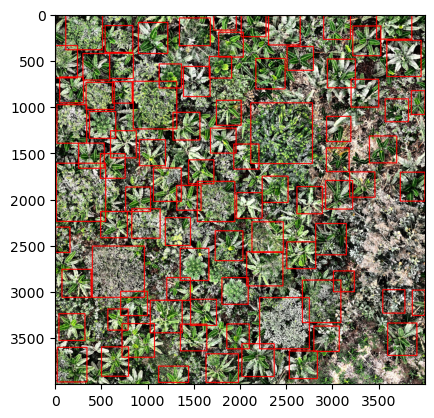

In [70]:
plt.imshow(updated[:,:,::-1])

This looks so much better even with just 10 epochs of training. 